## Generate Figure 3 (Fully or Partially Disallow UA, and Explictly Mention)

In [8]:
import json

In [9]:
with open("all_mentioned_props.json") as f:
    all_mentioned_props = json.load(f)

In [10]:
dates_have = ['Oct 2022',
 'Dec 2022',
 'Feb 2023',
 'Apr 2023',
 'Jun 2023',
 'Oct 2023',
 'Dec 2023',
 'Mar 2024',
 'Apr 2024',
 'May 2024',
 'Jun 2024',
 'Jul 2024',
 'Aug 2024',
 'Sep 2024',
 'Oct 2024']

(array([19266., 19358., 19448., 19539., 19631., 19723., 19814., 19905.,
       19997.]), [Text(19266.0, 0, '2022-10'), Text(19358.0, 0, '2023-01'), Text(19448.0, 0, '2023-04'), Text(19539.0, 0, '2023-07'), Text(19631.0, 0, '2023-10'), Text(19723.0, 0, '2024-01'), Text(19814.0, 0, '2024-04'), Text(19905.0, 0, '2024-07'), Text(19997.0, 0, '2024-10')])


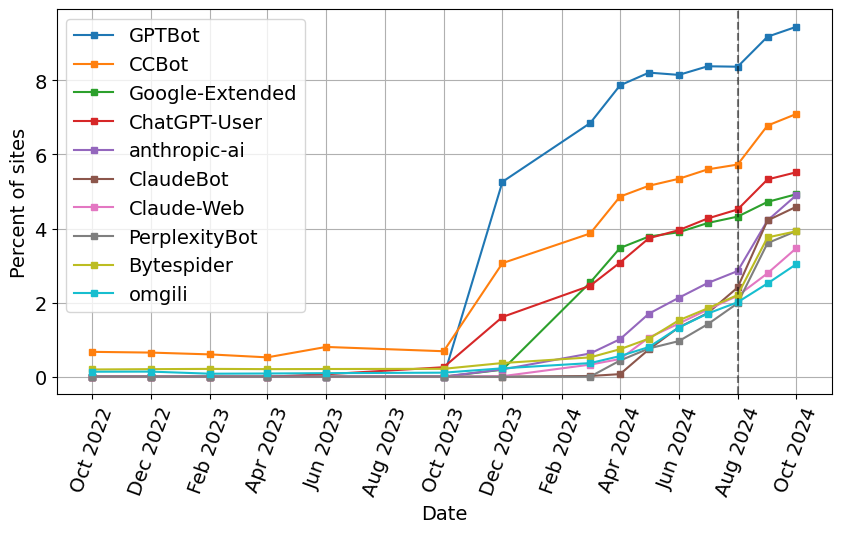

In [11]:
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
colors = plt.cm.tab20.colors + plt.cm.tab20b.colors
i=0

for ua in reversed(['omgili',
 'Bytespider',
 'PerplexityBot',
 'Claude-Web',
 'ClaudeBot',
 'anthropic-ai',
 'ChatGPT-User',
 'Google-Extended',
 'CCBot',
 'GPTBot']):
    df = pd.DataFrame(all_mentioned_props[ua]).T.sort_index()
    df.index= [datetime.strptime(key, "%b %Y") for key in dates_have]
    plt.plot((df['partially_disallowed (mentioned)'] + df['fully_disallowed (mentioned)'])*100, label=ua, marker='s', markersize=4)
    i += 1
print(plt.xticks())
FONTSIZE = 14
# Format the x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Adjust interval as needed

plt.xticks(rotation=70, fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.legend(prop={'size': FONTSIZE})
plt.ylabel("Percent of sites", fontsize=FONTSIZE)
plt.axvline(x=datetime.strptime('Aug 2024', "%b %Y"), linestyle='--', color='black', alpha=0.5)
plt.xlabel("Date", fontsize=FONTSIZE)
plt.grid()
plt.savefig("partially_and_fully_disallowed_mentioned-CAMERAREADY.pdf", bbox_inches='tight')